---



# ***SENTIMENT ANALYSIS OF TWEETS***



---

**Sentimental analysis is the process of computationally determining the opinion or attitude of the writers as positive, negative or neutral.
Sentiment analysis (also known as opinion mining or emotion AI) refers to the use of natural language processing, text analysis, computational linguistics, and biometrics to systematically identify, extract, quantify, and study affective states and subjective information. Sentiment analysis is widely applied to voice of the customer materials such as reviews and survey responses, online and social media, and healthcare materials for applications that range from marketing to customer service to clinical medicine.**





---


***In this notebook, we will build a model for analysis the sentiments of tweets and classify them as positive, neutral or negative.***


---





---

# ***.1. LOADING DATA***

---

In [34]:
#importing numpy and pandas libraries
import numpy as np
import pandas as pd

#This is for making some large tweets to be displayed
pd.options.display.max_colwidth = 100

#Load training data from train.txt
train_data = pd.read_csv("train.txt", encoding='ISO-8859-1')



---


# ***.2. DATA VISUALISATION (DATA ANALYSIS)***


---


>Check the shape of the training data

In [38]:
train_data.shape

(21465, 3)

>The are 3 columns in the dataset and there are total 21465 entries(rows). 

>Now, check the names of the columns

In [39]:
train_data.columns

Index(['tweet_id', 'sentiment', 'tweet_text'], dtype='object')

> Visualizing the first 5 rows of the train_data

In [40]:
#visualizing the first 5 rows of the training data
train_data.head()

,tweet_id,sentiment,tweet_text
0,264183816548130816,positive,Gas by my house hit $3.39!!!! I\u2019m going to Chapel Hill on Sat. :)
1,263405084770172928,negative,Theo Walcott is still shit\u002c watch Rafa and Johnny deal with him on Saturday.
2,262163168678248449,negative,its not that I\u2019m a GSP fan\u002c i just hate Nick Diaz. can\u2019t wait for february.
3,264249301910310912,negative,Iranian general says Israel\u2019s Iron Dome can\u2019t deal with their missiles (keep talking l...
4,262682041215234048,neutral,Tehran\u002c Mon Amour: Obama Tried to Establish Ties with the Mullahs http://t.co/TZZzrrKa via ...


>Taking a look at random tweets to gain more insights

In [41]:
#We will now take a look at random tweets to gain more insights
rand_indexs = np.random.randint(1,len(train_data),15).tolist()
train_data["tweet_text"][rand_indexs]

8312         Ok Dongwoo\u2019s fansite is not accepting new members right now...need to register on the 11th
12884    August 13 2015/1975: A celebration of 40 years since the Grateful Dead's legendary "One From The...
17684    @OnTheManney @hbryant42 I don't think Nike was ever an option. Part of it may be the small, inex...
2559     Enjoying my 1st time on Caltrain - bikes on the 1st floor\u002c passengers on the 2nd floor. htt...
603      recap. I saw Bad 25 on Tuesday. The Spike Lee Documentary on Michael Jackson. It was beyond amaz...
16382    @Loca_Lesley Well have to have a defensive stand at the beginning of the 3rd. But lord knows Ike...
14968    Is this the ultimate guide to detailing your car? It may very well be, courtesy of Lexus: http:/...
4763     @JbaGs17 good looks homie\u002c Im goin to pretty lights tomorrow night so lets burn it down ASA...
9450     @Novomix30 good field for Paris-Nice. First sportive of season for me tomorrow so good weekend o...
16165    Justin may

>Plot a bar plot of the 3 sentiments to know if the data is balanced or skewed

Text(0.5, 1.0, 'Dataset labels distribuition')

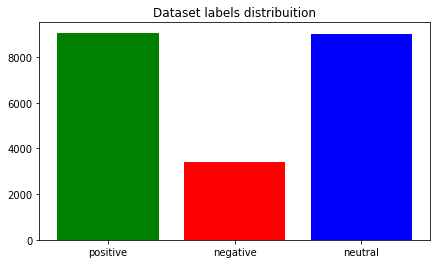

In [42]:
#import necessary modules
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

#plotting the bar plot
sentiment_cnt = Counter(train_data.sentiment)
plt.figure(figsize=(7,4))
plt.bar(sentiment_cnt.keys(),
        sentiment_cnt.values(),
        color=('g','r','b'))
plt.title("Dataset labels distribuition")

positive    42.226881
neutral     41.993944
negative    15.779175
Name: sentiment, dtype: float64


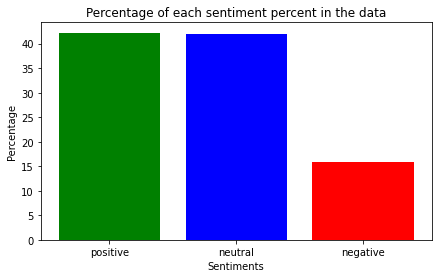

In [43]:
#ploting the percentage of each type of tweet in a bar plot
df = train_data['sentiment'].value_counts(normalize = True) * 100     
print(df)

plt.figure(figsize=(7,4))
plt.bar(x = df.index, height = df.values, label = df.index, color= ['green','blue','red'])
plt.xlabel("Sentiments")
plt.ylabel("Percentage")
plt.title("Percentage of each sentiment percent in the data")
plt.show()

>From the above plots is the evident that the data is highly skewed (41.993944% of neutral tweets, 42.226881% of positive tweets, 15,779175% of negative tweets).
The count of neutral and positive tweets is approximately equal, but the count of negative tweets is less.
The data is moderately skewed and might not affect the accuracy.

>Check the total number of positive, negative and neutral tweets

In [44]:
print(type(train_data))
train_data.sentiment.value_counts()

<class 'pandas.core.frame.DataFrame'>


positive    9064
neutral     9014
negative    3387
Name: sentiment, dtype: int64

> Checking if there's any null values in the data

In [45]:
train_data.isnull().sum()

tweet_id      0
sentiment     0
tweet_text    0
dtype: int64

>>There are no null cells in the data



---


# ***.3. DATA CLEANING FUNCTIONS***


---



>Find the emoticons used and classify them as happy and sad emoticons

In [46]:
#find what emoticons are used in our dataset
import re
tweets_text = train_data.tweet_text.str.cat()
emos = set(re.findall(r" ([xX:;][-']?.) ",tweets_text))
emos_count = []
for emo in emos:
    emos_count.append((tweets_text.count(emo), emo))
emos_count = sorted(emos_count,reverse=True)
print("The emoticons found in the data are:")
print(emos_count)
print()


#classify the emoticons as 'happy emoticons' and 'sad emoticons'
emos_happy = set([':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}', ':D',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)', '<3'])

emos_sad = set([':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('])  


#function to replace emoticons with sentiment related
def emos_replace(text):
  text = text.split()
  for i in range(len(text)):
    if text[i] in emos_happy:
      text[i] = 'happy'
    elif text[i] in emos_sad:
      text[i] = 'sad'
  text = ' '.join(text)
  return text

The emoticons found in the data are:
[(6151, ':/'), (3722, ': '), (517, ':)'), (194, ':3'), (190, 'X '), (136, ':D'), (123, ':('), (98, 'xx'), (86, ';)'), (86, ':-'), (70, 'xo'), (65, ':-)'), (48, 'XI'), (42, 'xD'), (39, 'XO'), (32, 'xI'), (30, 'XC'), (29, 'XD'), (29, ':P'), (25, 'x3'), (24, 'xv'), (23, 'XS'), (23, 'XF'), (23, '::'), (20, ':\\'), (19, 'Xo'), (17, 'XP'), (16, ':O'), (15, 'x6'), (14, 'Xi'), (13, 'X1'), (12, ':p'), (10, ';-)'), (9, 'X.'), (9, ':*'), (8, ';D'), (7, 'x)'), (6, 'X,'), (6, ':o'), (6, ":')"), (5, ';P'), (5, ':S'), (5, ":'("), (4, 'X:'), (4, ':L'), (4, ':-/'), (4, ':-('), (3, ';>'), (2, ';O'), (2, ':c'), (2, ':$'), (1, "X's"), (1, ';o'), (1, ';/'), (1, ';*'), (1, ':-P'), (1, ':-O')]



> Function to remove single letter words from the tweets

In [47]:
def del_singles(text):
  text = str(text)
  text = text.split()
  text_new=[]
  for word in text:
    if(len(word)>1):
      text_new.append(word)
  text_new = " ".join(text_new)
  return text_new

>Importing neccessay nltk modules

In [48]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

>Finding the frequency of words in the dataset

In [50]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
def most_used_words(text):
    tokens = word_tokenize(text)
    frequency_dist = nltk.FreqDist(tokens)
    return sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


>Lemmatization function

In [51]:
def lemmatize_tokenize(text):
    text = str(text)
    lemmatizer = WordNetLemmatizer()
    t = [lemmatizer.lemmatize(token) for token in word_tokenize(text)]
    text = ' '.join(t)
    return text

>Stemming function

In [52]:
def stem_tokenize(text):
    text = str(text)
    stemmer = SnowballStemmer("english")
    stemmer = WordNetLemmatizer()
    t = [stemmer.lemmatize(token) for token in word_tokenize(text)]
    text = ' '.join(t)
    return text

>Removing stopwords function

In [53]:
def remove_stopwords(text):
  mw = text.split()
  most_words = []
  for w in mw:
    if w in stopwords.words("english"):
      continue
    else:
      most_words.append(w.lower())
  text = ' '.join(most_words)
  return text

>Cleaning the tweets using the previously defined functions and regular expression to remove the words or letters or punctuations which might not contribute in deciding the sentiments.

The data_cleaning function does the following task:
*   removes non-ascii characters
*   replaces emoticons with the feeling they convey
*   removes retweets 'RT'
*   removes user mention '@'
*   removes numbers(digits)
*   removes the hastag '#'
*   removes punctuations
*   removes URLs/links
*   removes single letter words
*   removes stopwords
*   lemmatization
*   stemming
*   converts the text into lower case







In [54]:
def data_cleaning(text):

  #remove NON-ASCII characters
  text = re.sub('\\\\u[0-9A-Fa-f]{4}','', text)

  #mark emoticons as happy or sad
  text = emos_replace(text)

  # remove retweet 'RT' 
  text = re.sub('RT[\s]+', '', text)

  #remove the user mentions
  text = re.sub('@[A-Za-z0–9]+', '', text) 

  #remove numbers
  text = re.sub("[0-9]", "", text) 

  #Keeping only the word after the #
  text = re.sub('#', '', text)

  # remove usernames
  text = re.sub('@[^\s]+', '', text)
  text= re.sub(r"[-\.\n]", "",text)

  # remove links (URLs/ links)
  text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', text)

  # remove punctuations
  text = re.sub('[!"$%&\'()*+,-./:@;<=>?[\\]^_`{|}~]', '', text)

  # Removing HTML garbage
  text = re.sub(r"&\w+;", "",text)

  # replace repeated letters with only two occurences
  # heeeelllloooo => heelloo
  text = re.sub(r"(.)\1+", r"\1\1",text)

  #remove single letters 
  text = del_singles(text)

  #convert the text to lower case text
  text = text.lower()

  #since removal of stopwords and lemmatization reduces the frequency these are now commented
  #text = remove_stopwords(text)
  #text = lemmatize_tokenize(text)

  text = stem_tokenize(text)
  return text

In [55]:
#applying the data_cleaning function on the tweets
train_data['tweet_text'] = train_data['tweet_text'].apply(data_cleaning)

In [56]:
#check the cleaning data
train_data

,tweet_id,sentiment,tweet_text
0,264183816548130816,positive,gas by my house hit im going to chapel hill on sat happy
1,263405084770172928,negative,theo walcott is still shit watch rafa and johnny deal with him on saturday
2,262163168678248449,negative,it not that im gsp fan just hate nick diaz cant wait for february
3,264249301910310912,negative,iranian general say israel iron dome cant deal with their missile keep talking like that and we ...
4,262682041215234048,neutral,tehran mon amour obama tried to establish tie with the mullah via com no barack obama vote mitt ...
...,...,...,...
21460,522949024132112384,neutral,the day after newark ill be able to say met demi lovato yesterday and im meeting demi lovato tom...
21461,522372593312350209,neutral,fec hold farewell session for seven minister president goodluck jonathan on wednesday led the fe...
21462,522515200592052224,neutral,luca di montezemolo who last day wa monday on why alonso is leaving ferrari
21463,523089087155437568,positive,coffee is pretty much the answer to all question today friday tgif


>>*It is clearly visible that the text in the tweet_text column is cleaned. Now, there are no punctuations, RT, URLs, mentions, uppercase letters, single letter word, etc in these.*

>Creating a list of all the tweets in the train data and a list of tokens(i.e words in the data).

In [57]:
all_tweets = []
for tweet in train_data['tweet_text']:
  all_tweets.append(tweet)

tokens = []
for tweet in all_tweets:
  tokens.extend(word_tokenize(tweet))

In [58]:
print(all_tweets[:5])
print(tokens[:5])

['gas by my house hit im going to chapel hill on sat happy', 'theo walcott is still shit watch rafa and johnny deal with him on saturday', 'it not that im gsp fan just hate nick diaz cant wait for february', 'iranian general say israel iron dome cant deal with their missile keep talking like that and we may end up finding out', 'tehran mon amour obama tried to establish tie with the mullah via com no barack obama vote mitt romney']
['gas', 'by', 'my', 'house', 'hit']


# ***.4. BUILDING, TRAINING AND VALIDATING THE MODEL***

>Spliting the train_data into training and validation dataset

In [59]:
#importing train_test_split module of sklearn library
from sklearn.model_selection import train_test_split  

x = all_tweets
y = train_data['sentiment'].values

#spliting the data for training and validation
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 1)

#print the length of train and test(validation) data
print('Train data : ',len(x_train))
print('Test data : ',len(x_test))

Train data :  17172
Test data :  4293


>Converting the strings into numeric data that the model would understand

In [60]:
#import required libraries
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

#convert the string(tweets) data into numeric data which the SVM would understand
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(x_train)
test_vectors = vectorizer.transform(x_test)

>Training the model

In [61]:
#building SVM Model using tf- idf approach
print("Building a Support Vector Machine Model using TF-IDF approach")
from sklearn import svm
model_SVM = svm.SVC(C=0.98,kernel='linear')
model_SVM.fit(train_vectors, y_train)

Building a Support Vector Machine Model using TF-IDF approach


SVC(C=0.98, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

>Checking evaluation matrix, classification report and accuracy of the model



In [62]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred = model_SVM.predict(test_vectors)   
cm = confusion_matrix(y_test,y_pred)
report = classification_report(y_test,y_pred)
score = accuracy_score(y_test,y_pred)
print('='*60)
print("\n***** EVALUTION MATRIX : *****\n\n",cm)
print("\n"+'='*60)
print("\n***** CLASSIFICATION MATRIX : *****\n\n ",report)
print('='*60)
print("\n***** ACCURACY = ",score," *****")
print('\n'+'='*60)


***** EVALUTION MATRIX : *****

 [[ 242  315  104]
 [ 122 1312  396]
 [  43  537 1222]]


***** CLASSIFICATION MATRIX : *****

                precision    recall  f1-score   support

    negative       0.59      0.37      0.45       661
     neutral       0.61      0.72      0.66      1830
    positive       0.71      0.68      0.69      1802

    accuracy                           0.65      4293
   macro avg       0.64      0.59      0.60      4293
weighted avg       0.65      0.65      0.64      4293


***** ACCURACY =  0.6466340554390869  *****



#***THE ACCURACY OF THE MODEL IS APPROXIMATELY 64.55%***


